In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [20]:
def normal_pdf(x, mu, sigma):
    fraction = 1/(sigma*np.sqrt(2*np.pi))
    exp_term = -.5 * ((x-mu)/sigma)**2
    return fraction * np.exp(exp_term)

a)

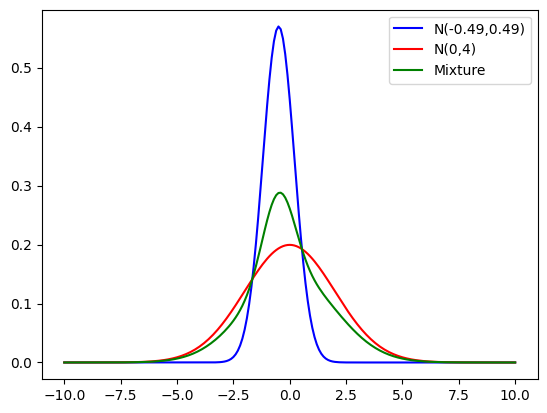

In [21]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
plt.plot(s, s_norm_1, label='N(-0.49,0.49)', color='blue')
plt.plot(s, s_norm_2, label='N(0,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
# plt.axvline(x=1, color='r', linestyle='--')
plt.legend()

b) Observando la figura se nota que es asimétrica positiva, ya que tiene una cola izquierda con mayor densidad (se nota entre 1 y 2)

c)

In [22]:
w1 = 0.75
w2 = 0.25
mu1 = 0
mu2 = -0.49
var1 = 4
var2 = 0.49

#Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

#Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

#Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

#Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis total (no en exceso)
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)

print("Media:", mu_mix)
print("Varianza:", round(var_mix,5))
print("Tercer momento μ₃:", round(mu_3,5))
print("Cuarto momento μ₄:",   round(mu_4,5))
print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))

Media: -0.1225
Varianza: 3.16752
Tercer momento μ₃: 0.95641
Cuarto momento μ₄: 36.55418
Asimetría: 0.16966
Kurtosis: 3.64333


d) Si, es leptocurtica ya que la kurtosis en exceso es 0.64. 

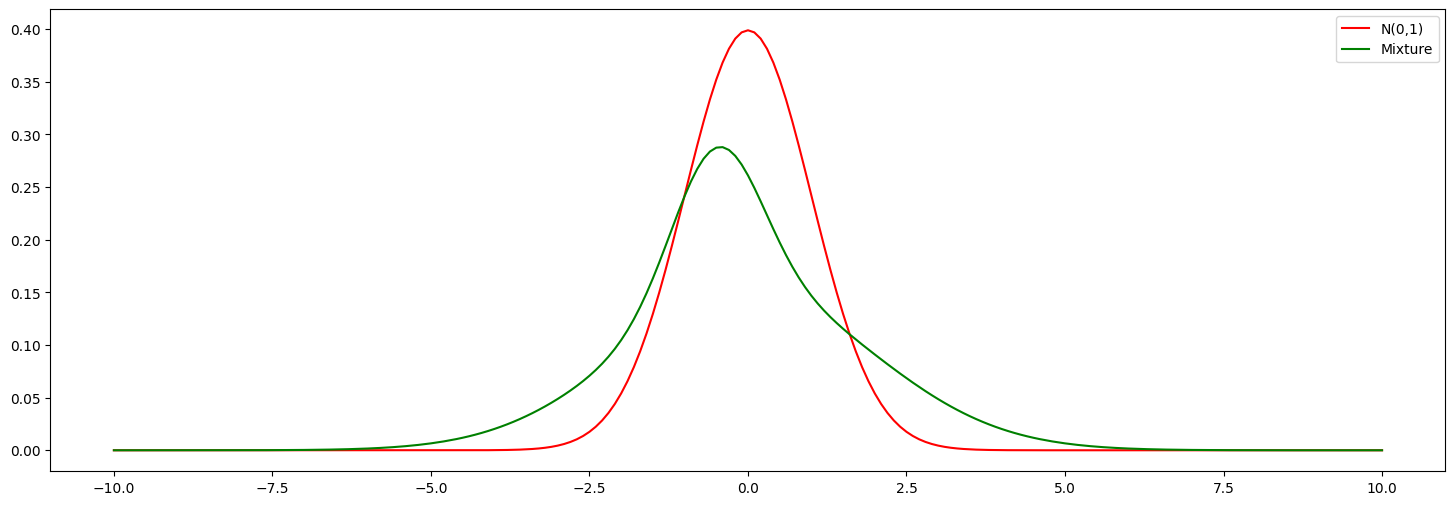

In [23]:
s = pd.Series(np.arange(-10,10.1,0.1))
norm_standar = normal_pdf(s, mu=0, sigma=1)
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
plt.figure(figsize=(18, 6))
plt.plot(s, norm_standar, label='N(0,1)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()

e) leptocurtica con cola pesada a ambos lados

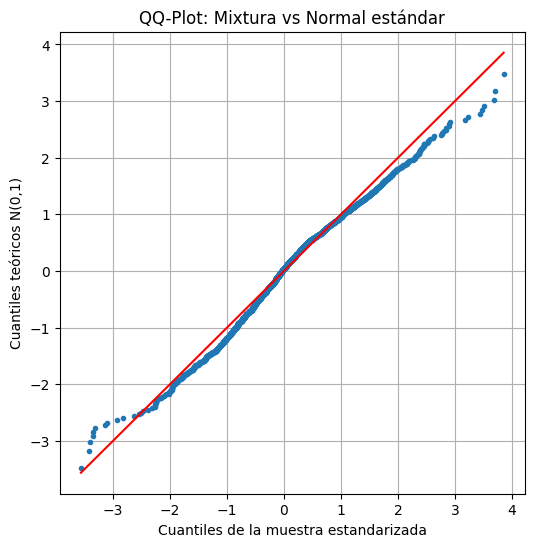

In [24]:
from scipy.stats import norm

# Generar muestra de 2000 valores
# Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.
u = np.random.rand(2000)
samples = np.where(u < w1,
                   np.random.normal(mu1, np.sqrt(var1), size=2000),
                   np.random.normal(mu2, np.sqrt(var2), size=2000)
                )

# Estandarizar la muestra
z = (samples - mu_mix) / var_mix**0.5

# Cuantiles teóricos de la normal estándar
probabilidades = (np.arange(1, 2001) - 0.5) / 2000
cuantiles_teoricos = norm.ppf(probabilidades)

# Ordenar la muestra estandarizada
z_ordenado = np.sort(z)

# QQ-Plot (eje horizontal: muestra estandarizada; eje vertical: teóricos)
plt.figure(figsize=(6, 6))
plt.plot(z_ordenado, cuantiles_teoricos, marker='.', linestyle='none')
xmin = min(z_ordenado.min(), cuantiles_teoricos.min())
xmax = max(z_ordenado.max(), cuantiles_teoricos.max())
plt.plot([xmin, xmax], [xmin, xmax], 'r-', label='Línea identidad')
plt.xlabel('Cuantiles de la muestra estandarizada')
plt.ylabel('Cuantiles teóricos N(0,1)')
plt.title('QQ-Plot: Mixtura vs Normal estándar')
plt.grid(True)
plt.show()

# 2)

In [25]:
df = pd.read_stata("MIA103_Final_Ejer_2_250823.dta")
df = df.set_index("t")
df.head()

,RBER_AR,RBER_AR_sd6
t,,
2010-01-01,98.870003,1.225477
2010-02-01,100.620003,1.976474
2010-03-01,99.820000,2.138749
2010-04-01,99.349998,1.786254
2010-05-01,102.059998,1.618118


a)

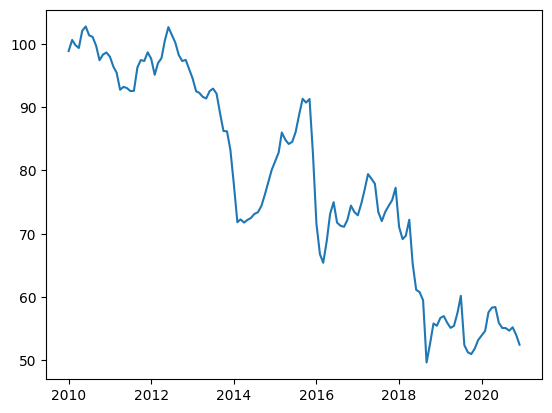

In [26]:
plt.plot(df['RBER_AR'])

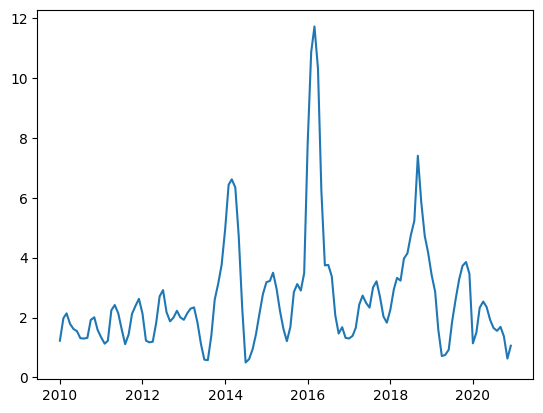

In [27]:
plt.plot(df['RBER_AR_sd6'])

b)

RBER_AR es I(0) con tendencia determinista, mientras que RBER_AR_sd6 es I(0).

In [28]:
from statsmodels.tsa.stattools import adfuller

c)
RBER_AR_detrended causa en el sentio de Granger a RBER_AR_sd6

In [29]:
# Con regression='c': es I(0)

y = df['RBER_AR_sd6'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

-4.275830716114617 0.000489025626409123


Corro regresión que hace stata de fondo para saber si hay tendencia deterministica

In [30]:
y = df["RBER_AR"].dropna().astype(float)

# 1) corre ADF para saber cuántos lags usó (autolag AIC en este ejemplo)
adf_stat, pval, k_lags, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
print("ADF stat:", adf_stat, "p-val:", pval, "lags:", k_lags)

ADF stat: -3.7043618301512495 p-val: 0.022071616204801303 lags: 1


In [31]:
# 2) construí la regresión ADF equivalente
import statsmodels.api as sm

T = len(y)
t = np.arange(1, T+1) # tendencia lineal
dy = y.diff()

X = pd.DataFrame({
"const": 1.0,
"trend": t,
"y_lag1": y.shift(1),
})

# agrega Δy_{t-i}, i=1..k
for i in range(1, k_lags+1):
    X[f"dy_lag{i}"] = dy.shift(i)

# variable dependiente: Δy_t
Y = dy

# 3) alineá y ajustá OLS
data = pd.concat([Y, X], axis=1).dropna()
Y_ols = data.iloc[:, 0]
X_ols = data.iloc[:, 1:]

res = sm.OLS(Y_ols, X_ols).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                RBER_AR   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     10.19
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           4.69e-06
Time:                        16:59:36   Log-Likelihood:                -293.33
No. Observations:                 130   AIC:                             594.7
Df Residuals:                     126   BIC:                             606.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7003      3.778      3.627      0.0

In [32]:
# 4) Conclusión

if res.pvalues["trend"] < 0.05:
    print("Rechazo H0: la serie tiene tendencia determinística.")
else:
    print("No se rechaza H0: la serie no tiene tendencia determinística.")

Rechazo H0: la serie tiene tendencia determinística.


In [33]:
# Con regression='ct' rechazo -> es I(0) con tendencia determinística
# Tengo que ver también OLS

y = df['RBER_AR'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')
print(adf[0], adf[1])

-3.7043618301512495 0.022071616204801303


In [34]:
# Resto tendencia determinista
df['RBER_AR_detrended'] = res.resid + res.params["const"]

-10.96827547730437 8.000099040783208e-20


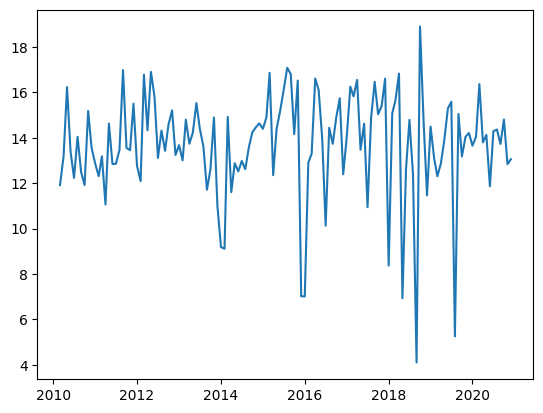

In [35]:
# Rechazo! Es I(0) con tendencia determinista
y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['RBER_AR_detrended'])

2. Hacemos un ajuste inicial sin especificar maxlags y elejimos un maxlags apropiado con Selection Order Criteria.

In [36]:
from statsmodels.tsa.api import VAR

model = VAR(df[["RBER_AR_detrended", "RBER_AR_sd6"]].dropna())

# Según todos los criterios, maxlags=2
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.086       3.133       21.89       3.105
1        1.533       1.674       4.630       1.590
2        1.032      1.268*       2.808      1.128*
3        1.082       1.413       2.952       1.216
4        1.141       1.566       3.132       1.314
5       1.013*       1.532      2.756*       1.224
6        1.034       1.647       2.816       1.283
7        1.069       1.778       2.922       1.357
8        1.074       1.877       2.939       1.400
9        1.096       1.993       3.009       1.460
10       1.119       2.111       3.086       1.522
11       1.159       2.245       3.220       1.600
12       1.113       2.293       3.083       1.592
13       1.159       2.434       3.242       1.677
--------------------------------------------------


/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3. Hacemos un guess

## Ecuación 1: RBER_AR_detrended.
* Efectos propios (AR terms):
* L1 positivo y fuerte (1.25, muy significativo, p<0.001).
* L2 negativo (-0.39, muy significativo, p<0.001).
* Efectos cruzados: coeficientes muy pequeños y no significativos

## Ecuación 2: RBER_AR_sd6
* Efectos propios (sd6):
* L1: 1.33, muy significativo.
* L2: −0.52, muy significativo.

* Efectos cruzados
* L1: -0.064, significativo (p=0.019)
* L2: 0.082, significativo (p=0.002)

In [37]:
selected_lag = 6
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Aug, 2025
Time:                     16:59:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.51675
Nobs:                     124.000    HQIC:                   1.16562
Log likelihood:          -383.272    FPE:                    2.52679
AIC:                     0.925404    Det(Omega_mle):         2.07001
--------------------------------------------------------------------
Results for equation RBER_AR_detrended
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       13.755424         3.923105            3.506           0.000
L1.RBER_AR_detrended         0.008948         0.102874            0.087           0.931
L1.RBER_AR_sd6      

5. Satisfecho con el guess, evalúo la estabilidad del modelo (que no haya raices unitarias ni residuos autocorrelacionados)

In [38]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(6) es estable: True.
Raíces del VAR(6):


array([ 0.82855159+1.49463829j,  0.82855159-1.49463829j,
       -1.1523362 +1.05990198j, -1.1523362 -1.05990198j,
        1.43713424-0.j        , -0.43735463+1.2368205j ,
       -0.43735463-1.2368205j , -1.26113383-0.j        ,
        0.58468841+1.06110726j,  0.58468841-1.06110726j,
        1.07593463+0.35868494j,  1.07593463-0.35868494j])

[1.70892989 1.70892989 1.56565351 1.56565351 1.43713424 1.31187043
 1.31187043 1.26113383 1.21153174 1.21153174 1.13414736 1.13414736]
El modelo VAR(6) es estable.


In [39]:
# H_0: residual autocorrelation up to lag x is zero
wb = result_var.test_whiteness(nlags=12)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: reject at 5% significance level. Test statistic: 37.090, critical value: 36.415>, p-value: 0.043>


In [40]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos no estan correlacionados :)
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 17 is zero: fail to reject at 5% significance level. Test statistic: 50.647, critical value: 60.481>, p-value: 0.228>


In [41]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).


# Rechazamos H0: RBER_AR_detrended causa en el sentio de Granger a RBER_AR_sd6!

print(result_var.test_causality("RBER_AR_detrended", ["RBER_AR_sd6"], kind="f"))
print(result_var.test_causality("RBER_AR_sd6", ["RBER_AR_detrended"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_sd6 does not Granger-cause RBER_AR_detrended: fail to reject at 5% significance level. Test statistic: 0.420, critical value: 2.140>, p-value: 0.866>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_detrended does not Granger-cause RBER_AR_sd6: reject at 5% significance level. Test statistic: 4.675, critical value: 2.140>, p-value: 0.000>


# 3.

Polinomio: a*x^2 + b*x + c

Ambas raices son >1 en módulo, por lo que es estacionario.

In [42]:
# Reales
import math, cmath

def raices_cuadratica(a,b,c):
    D = b*b - 4*a*c
    if D >= 0:
        sqrtD = math.sqrt(D)
    else:
        sqrtD = cmath.sqrt(D)
    return (-b + sqrtD)/(2*a), (-b - sqrtD)/(2*a)

print(raices_cuadratica(.18, -1.1, 1))

(5.000000000000001, 1.111111111111111)


In [43]:
# Imaginarios
import cmath

def raices_cuadratica(a, b, c):
    """
    Resuelve ax^2 + bx + c = 0 usando la resolvente.
    Devuelve (x1, x2). Soporta raíces complejas.
    """
    if a == 0:
        if b == 0:
            raise ValueError("a=b=0: no hay ecuación.")
        return (-c / b,)

    D = b*b - 4*a*c
    sqrtD = cmath.sqrt(D)
    x1 = (-b + sqrtD) / (2*a)
    x2 = (-b - sqrtD) / (2*a)
    return x1, x2

# Ejemplo:
print(raices_cuadratica(.18, -1.1, 1))

((5.000000000000001+0j), (1.111111111111111+0j))


# 4. 

In [44]:
df = pd.read_excel("../../Clase 7/Precios_y_Dinero.xlsx").rename({'M ': 'M'}, axis=1)
df.head()

,MMYY,IPC,M,M_en_ARS
0,2003-01-01,100.000000,100.000000,29609.920333
1,2003-02-01,100.566796,99.359830,29420.366429
2,2003-03-01,101.155116,102.628052,30388.084290
3,2003-04-01,101.212513,104.258927,30870.985333
4,2003-05-01,100.817908,111.804321,33105.170323


In [45]:
# Trabajo con inflación y crecimiento monetario
df['inflacion'] = (df['IPC'] - df['IPC'].shift(1)) / df['IPC'].shift(1) * 100
df['crec_m'] = (df['M'] - df['M'].shift(1)) / df['M'].shift(1) * 100

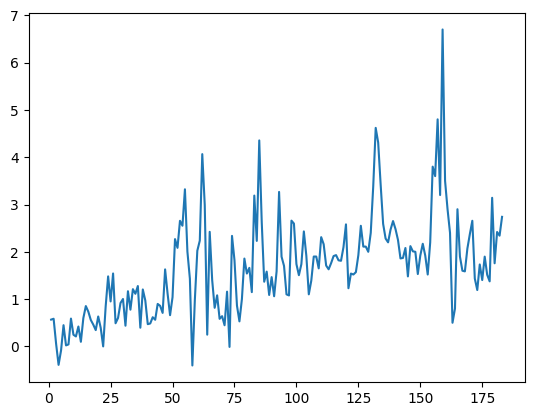

In [46]:
plt.plot(df['inflacion'])

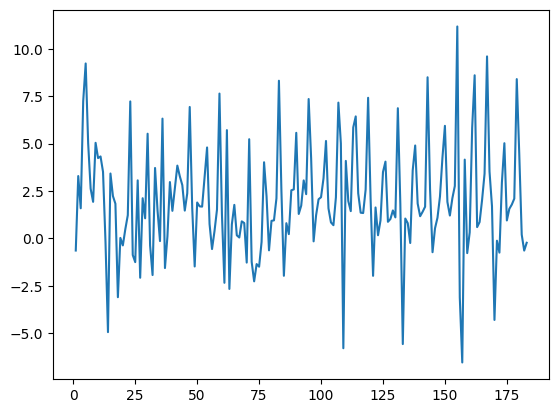

In [47]:
plt.plot(df['crec_m'])

In [48]:
# Rechazo H0: la serie es estacionaria

y = df['crec_m'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])

-3.67201257822809 0.02426772381487318


In [49]:
# Con regression='ct'rechazo (evidencia de estacionariedad), así que le saco la tendencia

y = df['inflacion'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])

-7.720398146539171 3.163671660812864e-10


In [50]:
# Agrego un t
df['index'] = list(range(len(df)))

# Calculo beta1 -> me da significativo, lo cual confirma la tendencia deterministica
import statsmodels.api as sm

df_reg = df[['inflacion', 'index']].dropna()
X = df_reg[['index']]
y = df_reg['inflacion']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflacion   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     96.16
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.78e-18
Time:                        16:59:36   Log-Likelihood:                -229.94
No. Observations:                 183   AIC:                             463.9
Df Residuals:                     181   BIC:                             470.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5763      0.127      4.541      0.0

In [51]:
# Resto tendencia determinista
df['inflacion_detrended'] = df['inflacion'] - (model.params['index'] * df['index'])

-7.741933072685119 1.056277852252593e-11


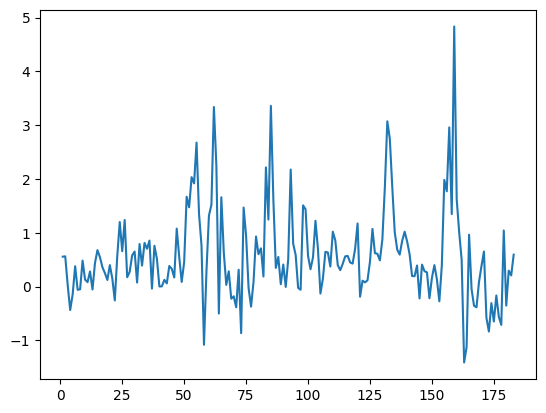

In [52]:
# Rechazo! Es I(0) con tendencia determinista
y = df['inflacion_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['inflacion_detrended'])

In [53]:
from statsmodels.tsa.api import VAR

model = VAR(df[["inflacion_detrended", "crec_m"]].dropna())

# AIC=13
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.849       1.886       6.353       1.864
1        1.555      1.667*       4.737       1.601
2        1.519       1.704       4.568      1.594*
3        1.510       1.769       4.528       1.615
4        1.516       1.850       4.556       1.652
5        1.534       1.942       4.640       1.700
6        1.528       2.010       4.613       1.724
7        1.504       2.059       4.502       1.729
8        1.528       2.158       4.615       1.784
9        1.558       2.262       4.760       1.844
10       1.483       2.261       4.417       1.798
11       1.454       2.306       4.293       1.799
12       1.346       2.272       3.858       1.722
13      1.337*       2.337      3.828*       1.743
14       1.370       2.444       3.961       1.806
--------------------------------------------------


/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [54]:
selected_lag = 13
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Aug, 2025
Time:                     16:59:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.35573
Nobs:                     170.000    HQIC:                   1.76385
Log likelihood:          -544.009    FPE:                    3.91601
AIC:                      1.35965    Det(Omega_mle):         2.91614
--------------------------------------------------------------------
Results for equation inflacion_detrended
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.373864         0.198183            1.886           0.059
L1.inflacion_detrended          0.443425         0.083319            5.322           0.000
L1.cre

In [55]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(13) es estable: True.
Raíces del VAR(13):


array([ 0.93728996+2.4346696j ,  0.93728996-2.4346696j ,
       -0.53144672+1.15689344j, -0.53144672-1.15689344j,
       -0.80047759+0.83900974j, -0.80047759-0.83900974j,
       -1.12492543-0.j        , -1.08229038+0.3019519j ,
       -1.08229038-0.3019519j ,  1.1125361 -0.j        ,
        0.80082318+0.77086512j,  0.80082318-0.77086512j,
        0.28734829+1.072839j  ,  0.28734829-1.072839j  ,
       -0.93802938-0.56298667j, -0.93802938+0.56298667j,
        1.04932422+0.23431783j,  1.04932422-0.23431783j,
        0.95705029+0.47267139j,  0.95705029-0.47267139j,
       -0.05731702-1.05752915j, -0.05731702+1.05752915j,
       -0.51933044-0.9132598j , -0.51933044+0.9132598j ,
        0.51631307-0.87493434j,  0.51631307+0.87493434j])

[2.60885578 2.60885578 1.27312138 1.27312138 1.15961274 1.15961274
 1.12492543 1.12362245 1.12362245 1.1125361  1.11155333 1.11155333
 1.11065411 1.11065411 1.09400782 1.09400782 1.07516797 1.07516797
 1.06740971 1.06740971 1.05908127 1.05908127 1.05059392 1.05059392
 1.01591795 1.01591795]
El modelo VAR(13) es estable.


In [56]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos estan correlacionados :(
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 26 is zero: reject at 5% significance level. Test statistic: 70.931, critical value: 69.832>, p-value: 0.042>


In [57]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).


# Rechazamos H0: inflacion_detrended causa en el sentio de Granger a crec_m!

print(result_var.test_causality("inflacion_detrended", ["crec_m"], kind="f"))
print(result_var.test_causality("crec_m", ["inflacion_detrended"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause inflacion_detrended: fail to reject at 5% significance level. Test statistic: 1.710, critical value: 1.754>, p-value: 0.058>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: inflacion_detrended does not Granger-cause crec_m: fail to reject at 5% significance level. Test statistic: 1.692, critical value: 1.754>, p-value: 0.062>
